# Decision Tree Clasification in Pyhton

- Easy to interpret both by practitioners and domain experts. Are *white box models*.
- Can explain exactly why a specific prediction was made.
- Require very little data preparation.
    - They not require feature scaling or centering at all.

Trees: 
- The representation of a Classification Decision Tree is a binary tree.
- Each node can have zero, one or two child nodes.
- A node represents a single input variable, assuming the variable is numeric.
- The leaf nodes of the tree contain an output variable (y), which is used to make a prediction.
- The split with the best cost (lowest cost) is selected.

#### Regression:

   > The cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle.
    
#### Classification:

   > The Gini cost function is used, which provides an indication of how pure the nodes are.





## Decision Tree Algorithm from Scratch

In [29]:
# Loading the data:
# we are going to use iris dataset
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:, 2:], columns = iris.feature_names[2:]) # We only will use two features for simplicity
y = iris.target
# And the dataset with X and y to work with it along the excersice
dataset = X.copy()
target_names = dict(zip([0, 1, 2], iris.target_names))
dataset['Species'] = [target_names[i]   for i in y]
dataset.head()

,petal length (cm),petal width (cm),Species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


### Gini index

- The gini index is our cost function, we going to use it to evaluate the splits in the dataset.

- A split in the dataset involves one input attribute and one value for that attribute. It can be used to divide training patterns into two groups of rows.

- Node purity refers to how mixed the training data assigned to each node is. A node is pure (`gini = 0`) if all training instances it applies to belong to the same class.

- Gini impurity is calculated as follows:
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2,$$

> where $p_{i,k}^2$ is the ratio of class $k$ instances among the trining instances in the $i^{th}$ node.

In [30]:
def gini_index(dataset, target_column, n_classes = target_names.values()):
    n_observs = dataset.shape[0] # Number of observations
    score = 0 # Score gets p_i for each class
    for k in n_classes:
        freq = len(np.where(dataset[target_column] == k)[0])
        p = freq / n_observs
        score += p*p
    gini = 1 - score
    return gini

### First gini index calculation
We can start by getting the *gini index* of the initial dataset. Keep in mind the following:

In [31]:
# Example of split
print('Dataset variables:', list(dataset.columns[:2]))
print('Dataset shape:',dataset.shape)
print('Dataset classes:',target_names.values())


Dataset variables: ['petal length (cm)', 'petal width (cm)']
Dataset shape: (150, 3)
Dataset classes: dict_values(['setosa', 'versicolor', 'virginica'])


The initial dataset has three classses, each one with a sample size of 50 observations. And we're just taking into account two variables.

In [32]:
print(F'The gini index of the original datset is: {gini_index(dataset, "Species")}')

The gini index of the original datset is: 0.6666666666666667


### Function to split the dataset
The following two funtions let us to split the dataset given an attribute (or variable) and a cutoff value:

In [33]:
def split_dataset(attribute, value, dataset):
    # For now it only works with numerical values
    assert isinstance(value, (int, float)), 'Only numerical values are permitted'
    left_ = np.where(dataset[attribute] <= value)
    right_ = np.where(dataset[attribute] > value)
    dataset_left = dataset.iloc[left_]
    dataset_right = dataset.iloc[right_]
    return dataset_left, dataset_right

In [100]:
# let's split the dataset
variable_ = 'petal length (cm)'
value_ = 2.45
df_left_1, df_right_1 = split_dataset(attribute=variable_, value = value_, dataset= dataset)

print(F'Num. of observations with "{variable_}" <= {value_}: {len(df_left_1)}')
print(F'Num. of observations with "{variable_}" > {value_}: {len(df_right_1)}')

Num. of observations with "petal length (cm)" <= 2: 50
Num. of observations with "petal length (cm)" > 2: 100


In [101]:
print(F'Gini index of Left node: {gini_index(df_left_1, "Species")}')
df_left_1['Species'].value_counts()

Gini index of Left node: 0.0


setosa    50
Name: Species, dtype: int64

In [36]:
print(F'Gini index of Right node: {gini_index(df_right_1, "Species")}')
df_right_1['Species'].value_counts()

Gini index of Right node: 0.5


versicolor    50
virginica     50
Name: Species, dtype: int64

### Let's try the next node
Now we are going tot take the right node whose *gini index* is 0.5. And we using the remaining variable; petal width.

In [37]:
# Next Node:
variable_ = 'petal width (cm)'
value_ = 1.75
df_r_left_2, df_r_right_2 = split_dataset(attribute=variable_, value = value_, dataset= df_right_1)
print(F'Num. of observations with "{variable_}" <= {value_}: {len(df_r_left_2)}')
print(F'Num. of observations with "{variable_}" > {value_}: {len(df_r_right_2)}')

Num. of observations with "petal width (cm)" <= 1.75: 54
Num. of observations with "petal width (cm)" > 1.75: 46


In [38]:
print(F'Gini index of Right-Left node: {gini_index(df_r_left_2, "Species")}')
df_r_left_2['Species'].value_counts()

Gini index of Right-Left node: 0.16803840877914955


versicolor    49
virginica      5
Name: Species, dtype: int64

In [39]:
print(F'Gini index of Left-Left node: {gini_index(df_r_right_2, "Species")}')
df_r_right_2['Species'].value_counts()

Gini index of Left-Left node: 0.04253308128544431


virginica     45
versicolor     1
Name: Species, dtype: int64

### How to choose the split
By now we are just passing the cutoff values and attributes for splitting directly.


## Getting the best split

The split functions was defined as:

$$
Split_i(S, k, t_k) =\begin{equation}
\left\{ 
  \begin{aligned}
    S_{left} = S: x_k \leq t_k\\
    S_{right} = S: x_k > t_k
  \end{aligned}
  \right.
\end{equation}
$$

> - where $S$ is the dataset at the current node, $k$ is a single feature, $t_k$ is the cutoff value for that feature, and $ S_{left}$ and S_{right} are the split subsets.

### Cost Function
To evaluate a given split (a binary split in this case) we could use the following cost function:
$$J(S_{left}, \ S_{left}) = \frac{m_{left}}{m}G(S_{left)} + \frac{m_{right}}{m}G(S_{right})$$

We would like to find a split that minimize the value of $J$ given the parameters $k$ and $t_k$.

where:
> - $G(S_{left/right})$ measures the impurity of the left/right subset.
- $m_{left/right}$ is the number of instances in the left/right subset.

### Information Gain
Another measure is Information Gain, which we is directly related to $J$, but in this case we would like to maximize $IG$:
$$IG(S, S_{left}, S_{right}) = G(S) - \frac{m_{left}}{m}G(S_{left)} + \frac{m_{right}}{m}G(S_{right}) = G(S) - J(S_{left}, \ S_{left})$$

In [102]:
# For simplicity we are going to use the cost Function
def cost_J(left, right, target_column = 'Species'):
    # first er have to get the G values
    G_left  = gini_index(left, target_column)
    G_right = gini_index(right, target_column)
    # Then the m values
    m_left = len(left)
    m_right = len(right)
    m = m_left + m_right
    J = (m_left / m)*G_left + (m_right / m)*G_right
    return(J)

### Finding the best split

In [135]:
def __find_best_split__(dataset, target_column = 'Species'):
    # Select the features, ignoring the target column
    features = dataset.drop(['Species'], axis = 1).columns
    lower_cost = 999999
    best_feature = None
    best_value = None
    # Iterate over all posible values
    for feature in features:
        feature_values = sorted(set(dataset.loc[:, feature]))
        for value in feature_values:
            # Perform the split
            left, right = split_dataset(attribute  = feature, value = value, dataset= dataset)
            # Skip the split if doesn't divide the dataset
            if len(left) == 0 or len(right) == 0:
                continue
            # Evaluate the split
            J = cost_J(left, right, target_column = target_column)
            # Keep the split if the cost is the lowest
            if J < lower_cost:
                lower_cost = J
                best_feature, best_value = feature, value
    return(best_feature, best_value)

In [136]:
__find_best_split__(dataset, target_column = 'Species')

('petal length (cm)', 1.9)

In [130]:
variable_, value_ = find_best_split(dataset, target_column = 'Species')
print(F'Best feature and value are: {variable_}, {value_}')
df_left_1, df_right_1 = split_dataset(attribute=variable_, value = value_, dataset= dataset)
print(F'Num. of observations with "{variable_}" <= {value_}: {len(df_left_1)}')
print(F'Num. of observations with "{variable_}" > {value_}: {len(df_right_1)}')
print(F'Gini index of the left split: {gini_index(df_left_1, "Species")}')
print(F'Gini index of the right split: {gini_index(df_right_1, "Species")}')

Best feature and value are: petal length (cm), 1.9
Num. of observations with "petal length (cm)" <= 1.9: 50
Num. of observations with "petal length (cm)" > 1.9: 100
Gini index of the left split: 0.0
Gini index of the right split: 0.5


As expected, the results are the same for the splitting and the gini indices, however the cutoff value is not the same as the value used by `sklearn`.

Let's take a look at the following question:

In [137]:
# Which values are between 1.9 and 2.4?
dataset[(dataset["petal length (cm)"] >= 1.9) & (dataset["petal length (cm)"] <= 2.4)]["petal length (cm)"]

24    1.9
44    1.9
Name: petal length (cm), dtype: float64

In the code above we're asking for values between 1.9 and 2.4 (the value that sklearb used for splitting). As you can see, there are no values between [1.9:2.4] instead of 1.9 (which we are using).

- So, what is the value after 1.9 in the feature?

In [138]:
# Which values are equal or above 1.9 (we had to order the observations)
dataset[(dataset["petal length (cm)"] >= 1.9)][["petal length (cm)", 'Species']].sort_values(by='petal length (cm)').head()

,petal length (cm),Species
24,1.9,setosa
44,1.9,setosa
98,3.0,versicolor
93,3.3,versicolor
57,3.3,versicolor


There we go! The next value is 3.0. Now as you can see, we only have to get the average between 1.9 and 3.0; 2.45!

Now, let's implement that in our original fucntion `__find_best_split__`:

In [200]:
def find_best_split(dataset, target_column = 'Species'):
    # Select the features, ignoring the target column
    features = dataset.drop(['Species'], axis = 1).columns
    lower_cost = 999999
    best_feature = None
    best_value = None
    # Iterate over all posible values
    for feature in features:
        feature_values = sorted(set(dataset.loc[:, feature]))
        for value in feature_values:
            # Perform the split
            left, right = split_dataset(attribute  = feature, value = value, dataset= dataset)
            # Skip the split if doesn't divide the dataset
            if len(left) == 0 or len(right) == 0:
                continue
            # Evaluate the split
            J = cost_J(left, right, target_column = target_column)
            # Keep the split if the cost is the lowest
            if J < lower_cost:
                lower_cost = J
                best_feature, best_value = feature, value
    # Gets the average value between the low and up cutoff best_values in the best_feature
    column = dataset[best_feature]
    best_value = (sorted(column[column > best_value])[0] + best_value) / 2
    return(best_feature, best_value)

In [201]:
variable_, value_ = find_best_split(dataset, target_column = 'Species')
print(F'Best feature and value are: {variable_}, {value_}')
df_left_1, df_right_1 = split_dataset(attribute=variable_, value = value_, dataset= dataset)
print(F'Num. of observations with "{variable_}" <= {value_}: {len(df_left_1)}')
print(F'Num. of observations with "{variable_}" > {value_}: {len(df_right_1)}')
print(F'Gini index of the left split: {gini_index(df_left_1, "Species")}')
print(F'Gini index of the right split: {gini_index(df_right_1, "Species")}')

Best feature and value are: petal length (cm), 2.45
Num. of observations with "petal length (cm)" <= 2.45: 50
Num. of observations with "petal length (cm)" > 2.45: 100
Gini index of the left split: 0.0
Gini index of the right split: 0.5


# Using Sklearn

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

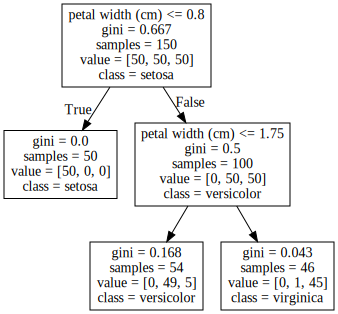

In [85]:
tree_gini_cfl = DecisionTreeClassifier(max_depth=2)
tree_gini_cfl.fit(X, y)

graph_gini = Source(tree.export_graphviz(tree_gini_cfl, out_file=None, 
    feature_names = iris.feature_names[2:], 
    class_names= iris.target_names))

display(SVG(graph_gini.pipe(format='svg')))

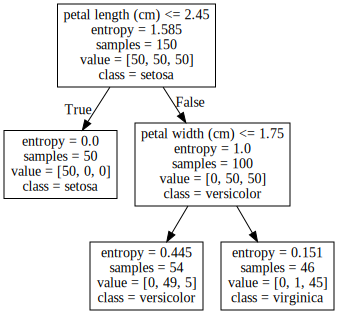

In [42]:
tree_entropy_cfl = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_entropy_cfl.fit(X, y)

graph_entropy = Source(tree.export_graphviz(tree_entropy_cfl, out_file=None, 
    feature_names = iris.feature_names[2:], 
    class_names= iris.target_names))

display(SVG(graph_entropy.pipe(format='svg')))